In [1]:
import os
import random
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from libs.utils import *
from libs.generate_boxes import *

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
tf.get_logger().setLevel('INFO')
tf.keras.backend.floatx()

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
class Bpp3DEnv():
    def __init__(self,length=20, breadth=20, height=20):
        super(Bpp3DEnv, self).__init__()
        self.length=length
        self.breadth=breadth
        self.height=height
        self.container=np.zeros((self.length,self.breadth))
    
    def step(self, upleft,bxl,bxb,bxh):
        self.container[upleft[0]:upleft[0]+bxl,upleft[1]:upleft[1]+bxb] += bxh
        return self.container, self.terminal_reward()
    
    def reset(self):
        self.container=np.zeros((self.length,self.breadth))
    
    def terminal_reward(self):
        return np.sum(self.container)/(self.length*self.breadth*self.height)

In [132]:
env = Bpp3DEnv()
s_size = 20*20
a_size = 20*20
state_size = s_size + a_size
action_size = 4
value_size = 1
N_MDD = 7
boxes, gt_pos = generation_3dbox(case_size=[[20,20,20]],min_s=1,N_mdd=N_MDD,is_prediv='h')
boxes, gt_pos = boxes[0], gt_pos[0]

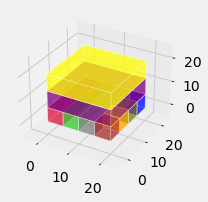

In [133]:
vis_box(boxes,gt_pos)

In [134]:
discount_factor = 0.99
actor_lr = 0.001
critic_lr = 0.005
env.reset()

In [135]:
actor = Sequential([
    Dense(24, input_dim=state_size, activation='relu'),
    Dense(action_size, activation='softmax')
], name='actor')
actor.compile(loss='categorical_crossentropy', optimizer=Adam(lr=actor_lr))
actor.summary()

Model: "actor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 24)                19224     
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 100       
Total params: 19,324
Trainable params: 19,324
Non-trainable params: 0
_________________________________________________________________


In [136]:
critic = Sequential([
    Dense(24, input_dim = state_size, activation='relu'),
    Dense(value_size, activation='linear')
], name='critic')
critic.compile(loss='mse', optimizer=Adam(lr=critic_lr))
critic.summary()

Model: "critic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 24)                19224     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 25        
Total params: 19,249
Trainable params: 19,249
Non-trainable params: 0
_________________________________________________________________


In [137]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, input_shape=(20,20,1), kernel_size=5, strides=2, activation='relu'))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 8, 8, 32)          832       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 3, 3, 64)          32832     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 1, 1, 32)          18464     
_________________________________________________________________
flatten_7 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 513       
Total params: 69,537
Trainable params: 69,537
Non-trainable params: 0
_________________________________________________

In [240]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 4, 4, 64)          0         
Total params: 8,576
Trainable params: 8,576
Non-trainable params: 0
_________________________________________________________________


In [218]:
next_state, reward = env.step(f_upleft[0], box[0], box[1], box[2])
next_state

array([[24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [236]:
history = np.reshape(next_state, [-1,20,20,1])
print(history.shape)
pred = model.predict(history)

(1, 20, 20, 1)


In [237]:
pred.shape

(1, 4, 4, 1)

In [238]:
pred = np.squeeze(pred)
pred.shape

(4, 4)

In [239]:
pred

array([[5.0194807, 5.0194807, 5.0194807, 5.0194807],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       ]], dtype=float32)

In [191]:
history.shape

(1, 20, 20, 1)

In [138]:
step = 0
history = env.container.copy()
box = boxes[step]
box

array([ 5, 20,  6])

In [91]:
w_upleft = whole_upleft(*box_cornel([0,0],20,20),box[0],box[1])
f_upleft = feasible_location(history,w_upleft,box[0],box[1],box[2],
                            state_H = env.height, is2d=False)
f_upleft

array([[ 0,  0],
       [16,  0]])

In [92]:
a_ops = action_options(f_upleft)
a_ops

[array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0

In [94]:
history = np.array([history.flatten()] * len(a_ops))
actions = np.array([sample.flatten() for sample in a_ops])
history.shape, actions.shape

((2, 400), (2, 400))

In [95]:
concate = np.concatenate([history, actions], axis=1)
concate.shape

(2, 800)

In [96]:
state = np.reshape(concate, [1, state_size])
state

ValueError: cannot reshape array of size 1600 into shape (1,800)